In [1]:
from sklearn.datasets import load_diabetes
from IPython.display import display, Image
import pandas as pd

# 필요한 모듈 불러오기 및 df화 하여 각각 확인해보기

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(diabetes_df.shape)
diabetes_df.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [2]:
df_X = diabetes.data
df_y = diabetes.target

#data와 target 분류 및 np array로 변환 (사실 위에서 df화 했기 때문에 필요없지만 한번 더)

df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [3]:
import numpy as np

# 혹시모를 문제 대비 백업용 저장

np_array_X = np.array(df_X)
np_array_y = np.array(df_y)

np.save('df_X.npy', np_array_X)
np.save('df_y.npy', np_array_y)

아래에서 부터는 train test 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


data에 10개의 feature가 있으므로, w는 10개 b는 1개!

In [5]:
W = np.random.rand(10)
b = np.random.rand()

In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("Model 준비완료")

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("mse로 준비완료")

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("Loss function 정의 완료")

Model 준비완료
mse로 준비완료
Loss function 정의 완료


In [7]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("gradient 설정완료! 다차원 변수이므로 미분식 사용!")

gradient 설정완료! 다차원 변수이므로 미분식 사용!


# 아래의 Learning rate을 조절하여 실험!

In [10]:
LEARNING_RATE = 0.02

In [11]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2941.4370
Iteration 20 : Loss 2941.4344
Iteration 30 : Loss 2941.4319
Iteration 40 : Loss 2941.4293
Iteration 50 : Loss 2941.4268
Iteration 60 : Loss 2941.4242
Iteration 70 : Loss 2941.4217
Iteration 80 : Loss 2941.4191
Iteration 90 : Loss 2941.4166
Iteration 100 : Loss 2941.4141
Iteration 110 : Loss 2941.4115
Iteration 120 : Loss 2941.4090
Iteration 130 : Loss 2941.4065
Iteration 140 : Loss 2941.4039
Iteration 150 : Loss 2941.4014
Iteration 160 : Loss 2941.3989
Iteration 170 : Loss 2941.3964
Iteration 180 : Loss 2941.3938
Iteration 190 : Loss 2941.3913
Iteration 200 : Loss 2941.3888
Iteration 210 : Loss 2941.3863
Iteration 220 : Loss 2941.3838
Iteration 230 : Loss 2941.3813
Iteration 240 : Loss 2941.3787
Iteration 250 : Loss 2941.3762
Iteration 260 : Loss 2941.3737
Iteration 270 : Loss 2941.3712
Iteration 280 : Loss 2941.3687
Iteration 290 : Loss 2941.3662
Iteration 300 : Loss 2941.3637
Iteration 310 : Loss 2941.3612
Iteration 320 : Loss 2941.3587
Iteration 330 : L

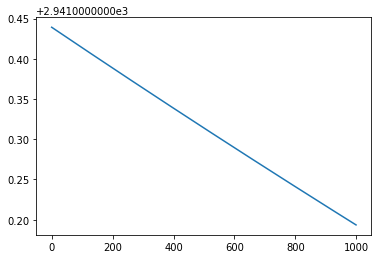

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [13]:
W, b

(array([ -15.45664359, -203.28874932,  531.35974184,  310.55264016,
         -90.41566202, -175.21097735, -168.30792574,  149.44100069,
         490.75389001,   99.71518328]),
 150.30060041321067)

In [14]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2715.6568873361016

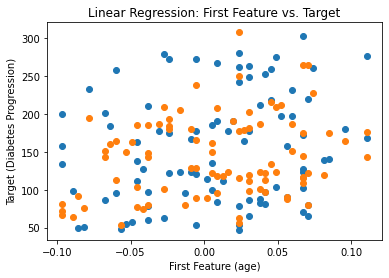

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.xlabel('First Feature (age)')
plt.ylabel('Target (Diabetes Progression)')
plt.title('Linear Regression: First Feature vs. Target')
plt.show()